In [34]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [35]:
# 指定文件夹路径
folder_path = 'sitephotos'

# 获取文件夹下的所有文件和子文件夹
files_and_folders = os.listdir(folder_path)

# 过滤出文件
photoname = [file for file in files_and_folders if os.path.isfile(os.path.join(folder_path, file))]
photopath = [os.path.join(folder_path, file) for file in files_and_folders if os.path.isfile(os.path.join(folder_path, file))]
print(photopath)

['sitephotos\\02409051909191.jpg', 'sitephotos\\1.jpg', 'sitephotos\\202409051909231.jpg', 'sitephotos\\202409051909241.jpg', 'sitephotos\\202409051909261.jpg', 'sitephotos\\202409051909271.jpg', 'sitephotos\\202409051909281.jpg', 'sitephotos\\202409051909301.jpg', 'sitephotos\\202409051909311.jpg', 'sitephotos\\202409051909361.jpg', 'sitephotos\\202409051909371.jpg', 'sitephotos\\202409051909401.jpg', 'sitephotos\\202409051909411.jpg', 'sitephotos\\220210314085901.jpg', 'sitephotos\\220210314090018.jpg', 'sitephotos\\220210314090028.jpg', 'sitephotos\\220210314090037.jpg', 'sitephotos\\220210314090053.jpg', 'sitephotos\\220210314090110.jpg', 'sitephotos\\220210314090120.jpg', 'sitephotos\\220210314090136.jpg', 'sitephotos\\220210315142024.jpg', 'sitephotos\\220210317160959.jpg', 'sitephotos\\220210317161017.jpg', 'sitephotos\\220210317161043.jpg', 'sitephotos\\220240905190638.jpg', 'sitephotos\\2202409051906381.jpg', 'sitephotos\\220240905190737.jpg', 'sitephotos\\220240905190919.jpg'

In [36]:
i=0
print(photopath[i])
# 读取图片
image_color = cv2.imread(photopath[i])
# 转换为灰度图片
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# 显示灰度图片
#cv2.imshow('Gray Image', image_gray)

# 等待键盘输入，之后关闭窗口
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#directory = os.path.dirname(photopath[i])

# 保存灰度图片
#cv2.imwrite(directory+photoname[0], image_gray)
#print(directory+photoname[0])

sitephotos\02409051909191.jpg


C:\Users\64473\AppData\Local\Temp\ipykernel_3120\3975695622.py:25: OptimizeWarning: Covariance of the parameters could not be estimated
  p , e = curve_fit(piecewise, xdata, ydata,p0=k)


9.868618513346226 31.459993014609147


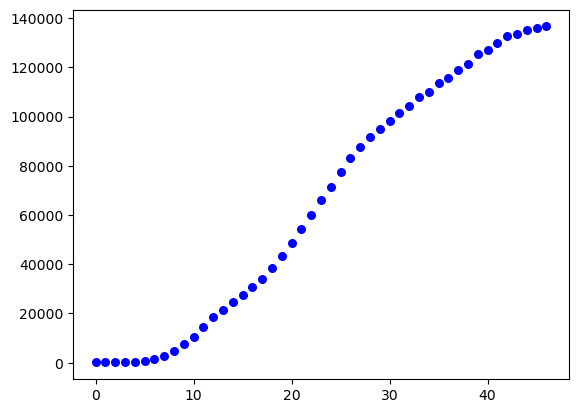

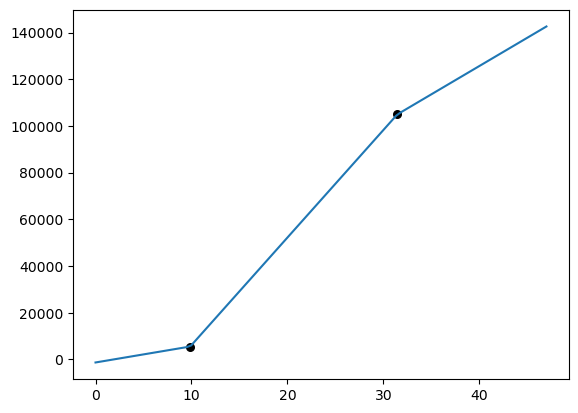

In [37]:
# 计算直方图
histogram = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
histogram = histogram.ravel()  # 将直方图展平为一维数组,频率
# 找到峰值对应的灰度级
imax = np.argmax(histogram)  # imax是直方图最大值的索引，即峰值灰度级
imin = np.argmin(histogram)
f_max = histogram[imax]  # f_max是imax对应的频率值，即峰值频率

xdata = np.arange(imax)#灰度
ydata = histogram[:imax]#频率

plt.scatter(xdata,ydata,s=30,c='b')
# 定义分段函数
def piecewise(x,x0,x1,y0,y1,k0,k1):
    return np.piecewise(x , [x <= x0, np.logical_and(x0<x, x<= x1),x>x1] ,
                        [lambda x:k0*(x-x0) + y0,#根据点斜式构建函数
                         lambda x:(x-x0)*(y1-y0)/(x1-x0)+y0,#根据两点式构建函数
                        lambda x:k1*(x-x1) + y1])
#根据分段函数进行拟合，通过迭代寻找最优的p，即为p_best
#注：p（p_best）中包含的是拟合之后求得的所有未知参数
perr_min = np.inf
p_best = None
for n in range(100):
    k = np.random.rand(6)*20
    p , e = curve_fit(piecewise, xdata, ydata,p0=k)
    perr = np.sum(np.abs(ydata-piecewise(xdata, *p)))
    if(perr < perr_min):
        perr_min = perr
        p_best = p
#根据p_best调用curve_fit函数绘制拟合图像
xd = np.linspace(0, len(xdata), 100)
if_=p_best[0]
it_=p_best[1]
print(if_,it_)
plt.figure()

plt.plot(xd, piecewise(xd, *p_best))
xx=(p_best[0],p_best[1])
yy=(p_best[2],p_best[3])

plt.scatter(xx,yy,s=30,c='black')
plt.show()

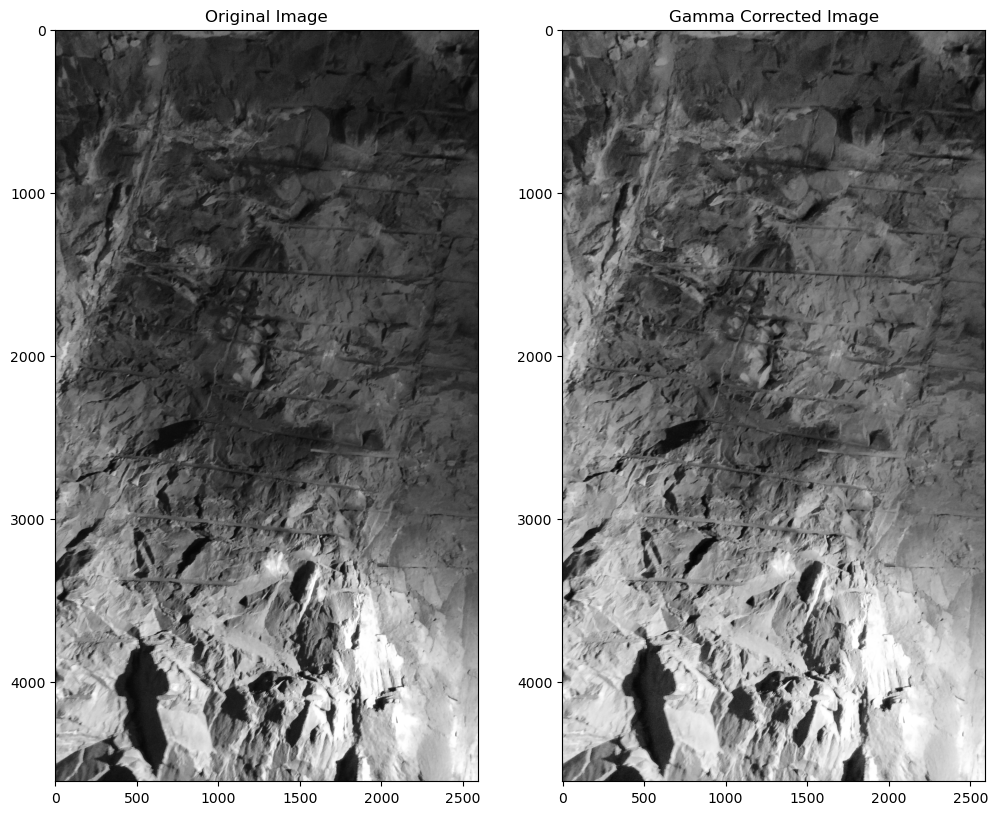

In [38]:
# 广义伽马校正公式拟合
def gamma_func(x, alpha, delta, gamma):
    return 255 * (x / 255) ** (alpha / (x + delta) + gamma)

# 使用已知点拟合参数
popt, _ = curve_fit(gamma_func, np.array([0, imin, if_, it_, 255]), np.array([0, 0, if_, imax, 255]))
alpha, delta, gamma = popt

# 应用广义伽马校正
corrected_image = gamma_func(image_gray, alpha, delta, gamma).astype(np.uint8)

# 显示原图和校正后的图像
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(corrected_image, cmap='gray')
plt.title('Gamma Corrected Image')

plt.show()
#校正前图像，校正后图像image_gray,corrected_image

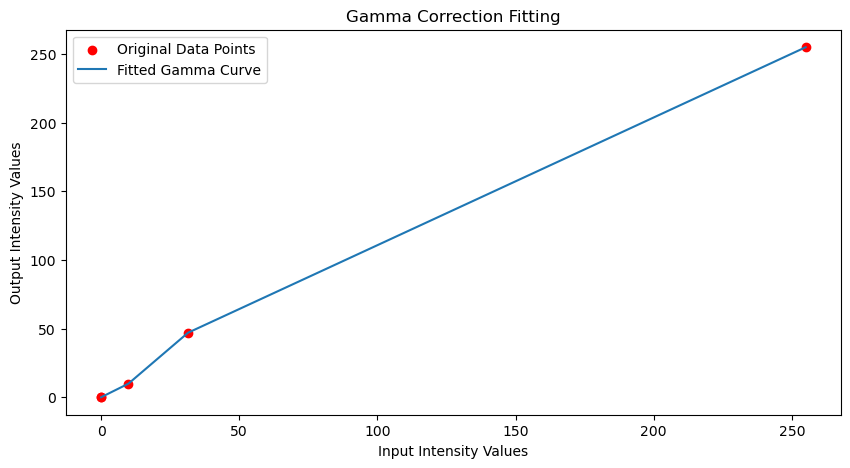

In [39]:

# 假设你已经有了以下变量
# image_gray: 灰度图像
# imin, if_, it_, imax: 已知的灰度级点
# alpha, delta, gamma: 拟合得到的参数

# 广义伽马校正公式

# 已知点
x_data = np.array([0, imin, if_, it_, 255])
y_data = np.array([0, 0, if_, imax, 255])


# 绘制原始数据点
plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, color='red', label='Original Data Points')

# 绘制拟合曲线
x_fit = np.linspace(0, 255, 256)
y_fit = gamma_func(x_data, alpha, delta, gamma)
plt.plot(x_data, y_fit, label='Fitted Gamma Curve')

# 设置图表标题和标签
plt.title('Gamma Correction Fitting')
plt.xlabel('Input Intensity Values')
plt.ylabel('Output Intensity Values')
plt.legend()

# 显示图表
plt.show()

In [1]:
def compute_hessian_matrix(image):

    # 计算图像的二阶导数
    dxx = cv2.Sobel(image, cv2.CV_64F, 2, 0, ksize=3)
    dyy = cv2.Sobel(image, cv2.CV_64F, 0, 2, ksize=3)
    dxy = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
    
    # 创建Hessian矩阵
    hessian_matrix = np.stack((dxx, dxy, dxy, dyy), axis=-1).reshape(image.shape[0], image.shape[1], 2, 2)
    
    return hessian_matrix


# 计算Hessian矩阵
hessian_matrix = compute_hessian_matrix(corrected_image)

# 显示Hessian矩阵的一个示例
print(hessian_matrix[100, 100])  # 打印图像中(100, 100)位置的Hessian矩阵

NameError: name 'corrected_image' is not defined